In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#  데이터 로드
df_fin = pd.read_csv('data/(창민)금융지표계산.csv')
df_real = pd.read_csv('data/(창민)실물지표계산.csv')
df_fin.index = pd.to_datetime(df_fin.index)
df_real.index = pd.to_datetime(df_real.index)

In [31]:
# 데이터 병합
df = df_fin[['fin_index']].join(df_real[['real_index']], how='inner')

In [32]:
# Gap(괴리도) 계산 및 상/하위 10% 산출
df['gap'] = df['fin_index'] - df['real_index']
top_10 = df['gap'].quantile(0.90)
bot_10 = df['gap'].quantile(0.10)

In [33]:
# 국면 판정
df['top_regime'] = df['gap'] >= top_10
df['bottom_regime'] = df['gap'] <= bot_10

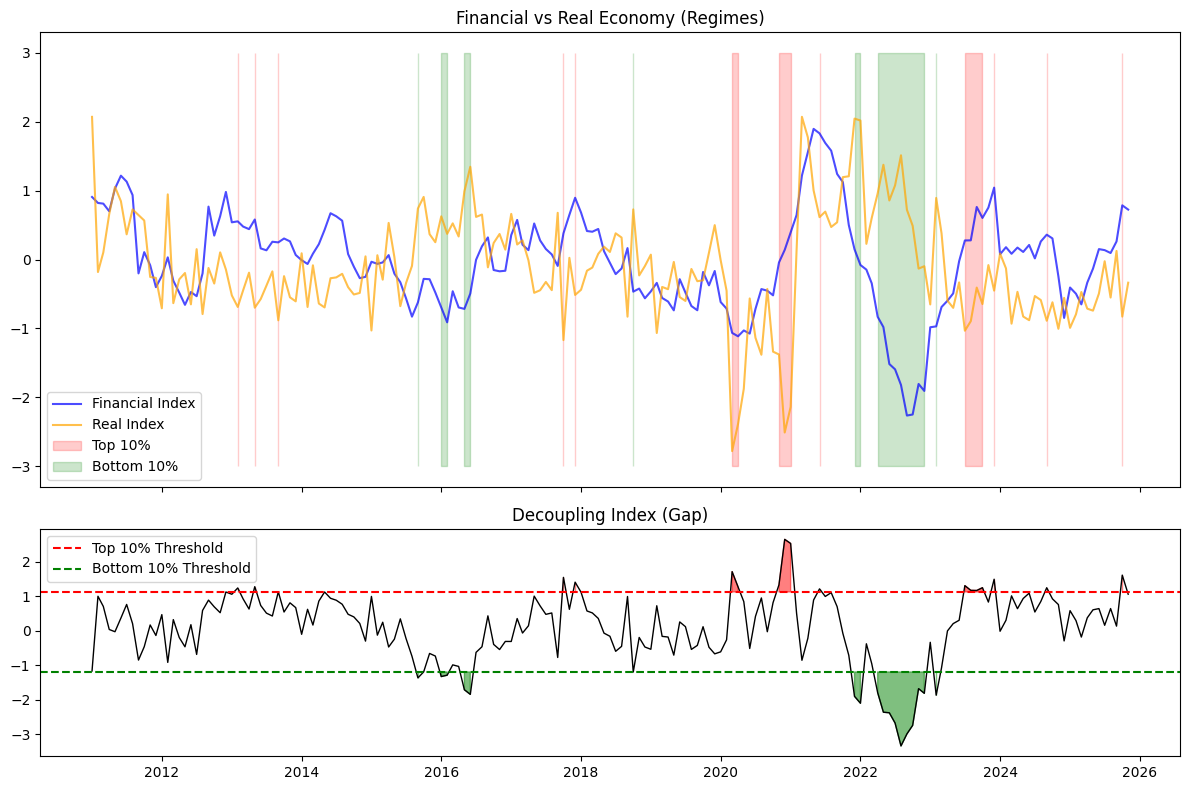

In [39]:
# 5. 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# 상단: 두 지수 비교
ax1.plot(df.index, df['fin_index'], label='Financial Index', color='blue', alpha=0.7)
ax1.plot(df.index, df['real_index'], label='Real Index', color='orange', alpha=0.7)
ax1.fill_between(df.index, -3, 3, where=df['top_regime'], color='red', alpha=0.2, label='Top 10%')
ax1.fill_between(df.index, -3, 3, where=df['bottom_regime'], color='green', alpha=0.2, label='Bottom 10%')
ax1.set_title('Financial vs Real Economy (Regimes)')
ax1.legend()

# 하단: Gap 추이
ax2.plot(df.index, df['gap'], color='black', linewidth=1)
ax2.axhline(top_10, color='red', linestyle='--', label='Top 10% Threshold')
ax2.axhline(bot_10, color='green', linestyle='--', label='Bottom 10% Threshold')
ax2.fill_between(df.index, df['gap'], top_10, where=df['gap']>=top_10, color='red', alpha=0.5)
ax2.fill_between(df.index, df['gap'], bot_10, where=df['gap']<=bot_10, color='green', alpha=0.5)
ax2.set_title('Decoupling Index (Gap)')
ax2.legend()

plt.tight_layout()
plt.show()

In [41]:
# 파일 저장
df.to_csv('decoupling_results.csv', encoding='utf-8-sig')